<a href="https://colab.research.google.com/github/sirleudo/sigmoidal_data_science/blob/master/Regress%C3%A3o%20Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://github.com/sirleudo/sigmoidal_data_science/blob/master/logo_pensatah.png?raw=true">

#### **Data Science na Prática 2.0**
*by Sirleudo Evaristo*

# **Regresão Logística**

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.
`Fonte`: [texto do link](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica)

## Regressão Logística no **`scikit-learn`**

O conjunto de dados `arquivo csv` desta pesquisa, encontra-se  neste [link](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Vamos criar um modelo de Regressão Logista sob o diagnostico angiográfico (diagnostico de doença cardiaca). 

* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1: há doença cardíaca ( > 50% de estreitamento do diâmetro)

In [21]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver as primeiras entradas
print("Tamanho do df: {}\n".format(df.shape))
df.head()

Tamanho do df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Aqui, vamos importar o **`scikit learn`**, a **matriz de confusão** e as **métricas** para criar o modelo de regressão logística. 

In [3]:
# importar o scikit-learn para criar modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Seguindo os 05 passos abaixo, faremos a divisão do *dataset* entre treino e teste para criar modelos preditivos.

In [4]:
# 1. Escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3.2 Padronizar os dadso de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados e padronizar os dados teste
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        40
           1       0.84      0.72      0.78        36

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



## Plotar matriz de confusão ou de erro

A matriz de confusão, também conhecida como matriz de erro é um layout de tabela que permite a visualização dos dados gerados por um algoritmo de Machine Learning.

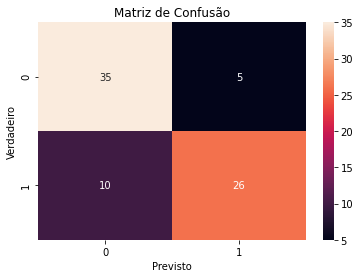

In [12]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title('Matriz de Confusão')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

plt.show()

Abaixo, a probabilidade associada a cada previsão, onde foi utilizado o metodo `predict_proba`. 

In [20]:
y_prob = model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\ny_proba: \n", y_prob[0:5])

y_pred: 
 [0 1 0 0 0]

y_proba: 
 [[0.7656695  0.2343305 ]
 [0.04064098 0.95935902]
 [0.94063958 0.05936042]
 [0.9513674  0.0486326 ]
 [0.93506471 0.06493529]]
